In [1]:
import pandas as pd
import numpy as np
from numpy import where
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import pickle

In [2]:
# Read CSV File
data = pd.read_csv('data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
# Check Null Values In Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [5]:
# Check statistical values of dataset
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
# Check Columns of Dataset
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [7]:
# Check for null values
data.isnull()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6815,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6816,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6817,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

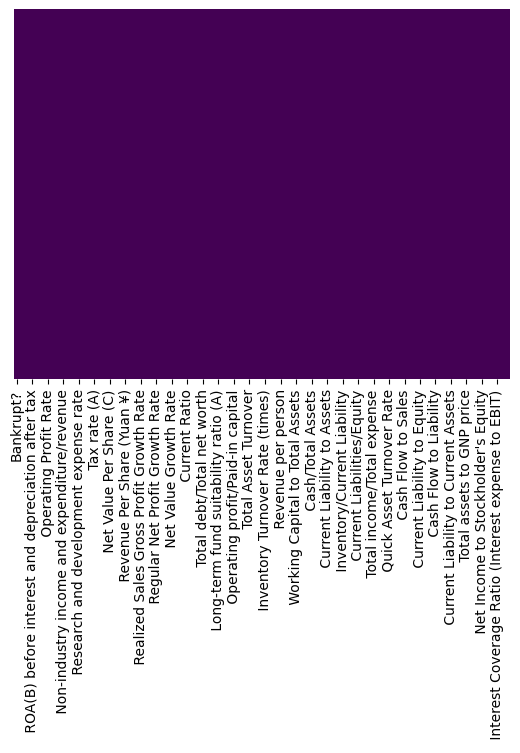

In [8]:
# Generate Heatmap for null values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Duplicate Rows:
Empty DataFrame
Columns: [Bankrupt?,  ROA(C) before interest and depreciation before interest,  ROA(A) before interest and % after tax,  ROA(B) before interest and depreciation after tax,  Operating Gross Margin,  Realized Sales Gross Margin,  Operating Profit Rate,  Pre-tax net Interest Rate,  After-tax net Interest Rate,  Non-industry income and expenditure/revenue,  Continuous interest rate (after tax),  Operating Expense Rate,  Research and development expense rate,  Cash flow rate,  Interest-bearing debt interest rate,  Tax rate (A),  Net Value Per Share (B),  Net Value Per Share (A),  Net Value Per Share (C),  Persistent EPS in the Last Four Seasons,  Cash Flow Per Share,  Revenue Per Share (Yuan ¥),  Operating Profit Per Share (Yuan ¥),  Per Share Net profit before tax (Yuan ¥),  Realized Sales Gross Profit Growth Rate,  Operating Profit Growth Rate,  After-tax Net Profit Growth Rate,  Regular Net Profit Growth Rate,  Continuous Net Profit Growth Rate,  Total Ass

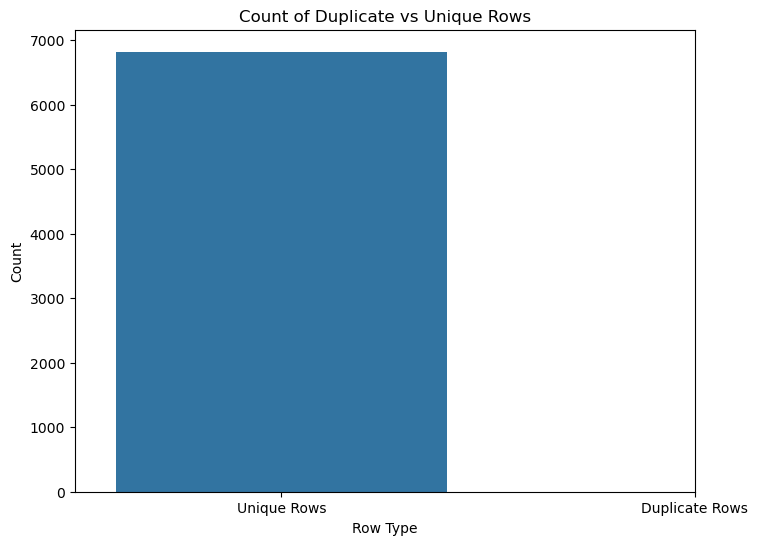

In [9]:
# Check for duplicate rows
duplicates = data[data.duplicated(keep=False)]
print("Duplicate Rows:")
print(duplicates)

# Count duplicate occurrences
duplicate_count = data.duplicated().sum()
print(f"\nTotal duplicate rows: {duplicate_count}")

# Create a column to flag duplicates for plotting
data['is_duplicate'] = data.duplicated(keep=False).astype(int)

# Plot the duplicate rows
plt.figure(figsize=(8, 6))
sns.countplot(x='is_duplicate', data=data)
plt.xticks([0, 1], ['Unique Rows', 'Duplicate Rows'])
plt.title("Count of Duplicate vs Unique Rows")
plt.ylabel("Count")
plt.xlabel("Row Type")
plt.show()

In [10]:
# Count Total Number of target values
data['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

<Axes: xlabel='Bankrupt?', ylabel='count'>

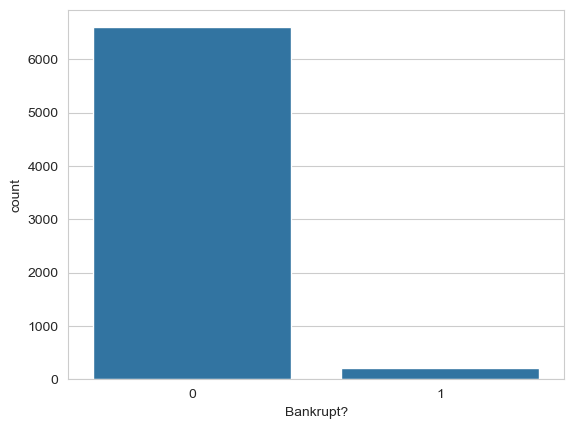

In [11]:
# Plot Graph of Bankrupt Value Counts
sns.set_style('whitegrid')
sns.countplot(x = 'Bankrupt?', data = data)

In [12]:
# Separate X and y from data
X = data.iloc[:, 1:len(data)]
y = data.iloc[:, 0:1]

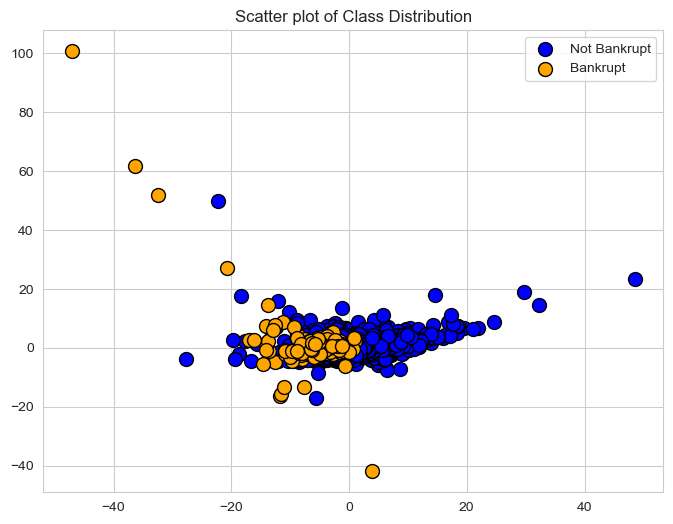

In [13]:
# Scatter plot of classes

# Standardizing the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Filter the data based on class y = 0 and y = 1
X_pca_y0 = X_pca[y['Bankrupt?'] == 0]
X_pca_y1 = X_pca[y['Bankrupt?'] == 1]

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for class y=0
plt.scatter(X_pca_y0[:, 0], X_pca_y0[:, 1], color='blue', label='Not Bankrupt', s=100, edgecolors='k')

# Scatter plot for class y=1
plt.scatter(X_pca_y1[:, 0], X_pca_y1[:, 1], color='orange', label='Bankrupt', s=100, edgecolors='k')

# Adding labels and legend
plt.title("Scatter plot of Class Distribution")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [14]:
# Using SMOTE for oversampling
smote = SMOTE(random_state = 42)

In [15]:
# Resampled X and y
resampled_X, resampled_y = smote.fit_resample(X, y)

In [16]:
# Check Results after resampling
resampled_y.value_counts()

Bankrupt?
0            6599
1            6599
Name: count, dtype: int64

<Axes: xlabel='Bankrupt?', ylabel='count'>

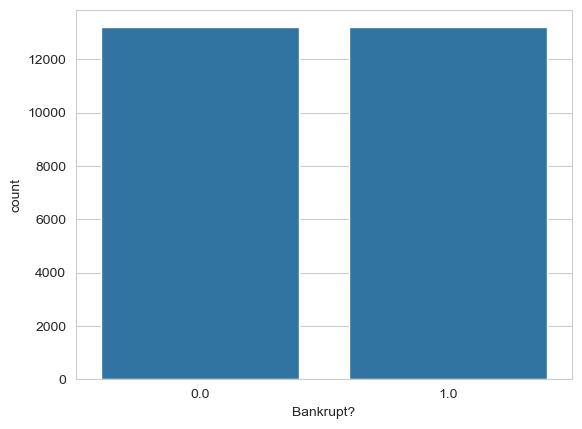

In [17]:
sns.set_style('whitegrid')
sns.countplot(x = 'Bankrupt?', data = pd.concat([resampled_X, resampled_y]))

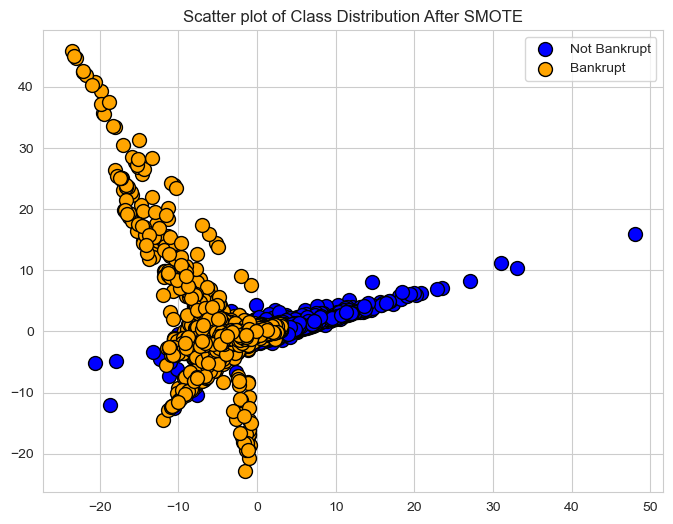

In [18]:
# Scatter plot of classes after oversampling

# Standardizing the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(resampled_X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Filter the data based on class y = 0 and y = 1
X_pca_y0 = X_pca[resampled_y['Bankrupt?'] == 0]
X_pca_y1 = X_pca[resampled_y['Bankrupt?'] == 1]

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for class y=0
plt.scatter(X_pca_y0[:, 0], X_pca_y0[:, 1], color='blue', label='Not Bankrupt', s=100, edgecolors='k')

# Scatter plot for class y=1
plt.scatter(X_pca_y1[:, 0], X_pca_y1[:, 1], color='orange', label='Bankrupt', s=100, edgecolors='k')

# Adding labels and legend
plt.title("Scatter plot of Class Distribution After SMOTE")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [19]:
# Undersampling
random_under_sampler = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')

under_sampled_X, under_sampled_y = random_under_sampler.fit_resample(X, y)

In [20]:
# Check Results after undersampling
under_sampled_y.value_counts()

Bankrupt?
0            220
1            220
Name: count, dtype: int64

<Axes: xlabel='Bankrupt?', ylabel='count'>

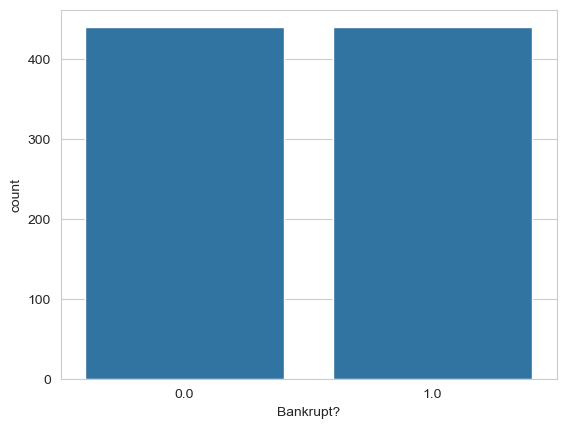

In [21]:
sns.set_style('whitegrid')
sns.countplot(x = 'Bankrupt?', data = pd.concat([under_sampled_X, under_sampled_y]))

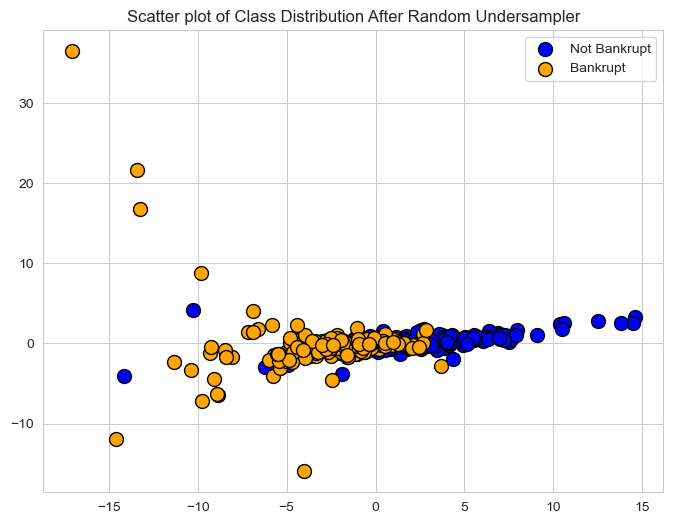

In [22]:
# Scatter plot of classes after under sampling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(under_sampled_X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Filter the data based on class y = 0 and y = 1
X_pca_y0 = X_pca[under_sampled_y['Bankrupt?'] == 0]
X_pca_y1 = X_pca[under_sampled_y['Bankrupt?'] == 1]

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for class y=0
plt.scatter(X_pca_y0[:, 0], X_pca_y0[:, 1], color='blue', label='Not Bankrupt', s=100, edgecolors='k')

# Scatter plot for class y=1
plt.scatter(X_pca_y1[:, 0], X_pca_y1[:, 1], color='orange', label='Bankrupt', s=100, edgecolors='k')

# Adding labels and legend
plt.title("Scatter plot of Class Distribution After Random Undersampler")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [23]:
# Feature Selection
# Apply SelectKBest to select top 50 features
best_features = SelectKBest(score_func = chi2, k = 50)
fit = best_features.fit(resampled_X, resampled_y)

In [24]:
# Convert score of best features to data frame
feature_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X.columns)

In [25]:
# Concat feature_score and features for data visualization
feature_scores = pd.concat([features, feature_score], axis = 1)
feature_scores.columns = ['Feature', 'Score']

In [26]:
feature_scores

,Feature,Score
0,ROA(C) before interest and depreciation befor...,57.591456
1,ROA(A) before interest and % after tax,69.434259
2,ROA(B) before interest and depreciation after...,58.718090
3,Operating Gross Margin,0.550790
4,Realized Sales Gross Margin,0.543835
...,...,...
91,Degree of Financial Leverage (DFL),0.046027
92,Interest Coverage Ratio (Interest expense to ...,0.000120
93,Net Income Flag,0.000000
94,Equity to Liability,54.775181


In [27]:
# Printing top 50 features
print(feature_scores.nlargest(50, 'Score'))

                                              Feature         Score
48                    Fixed Assets Turnover Frequency  1.649897e+12
58                             Cash/Current Liability  8.404406e+11
11              Research and development expense rate  5.000215e+11
73                                 Cash Turnover Rate  2.997620e+11
28                            Total Asset Growth Rate  2.977519e+11
71                          Quick Asset Turnover Rate  2.351336e+11
75                             Fixed Assets to Assets  1.139464e+11
86                          Total assets to GNP price  1.084306e+11
10                             Operating Expense Rate  9.333703e+10
47                    Inventory Turnover Rate (times)  7.878984e+10
50                                 Revenue per person  7.868580e+10
29                              Net Value Growth Rate  7.753339e+10
13                Interest-bearing debt interest rate  6.447552e+10
70                        Current Asset Turnover

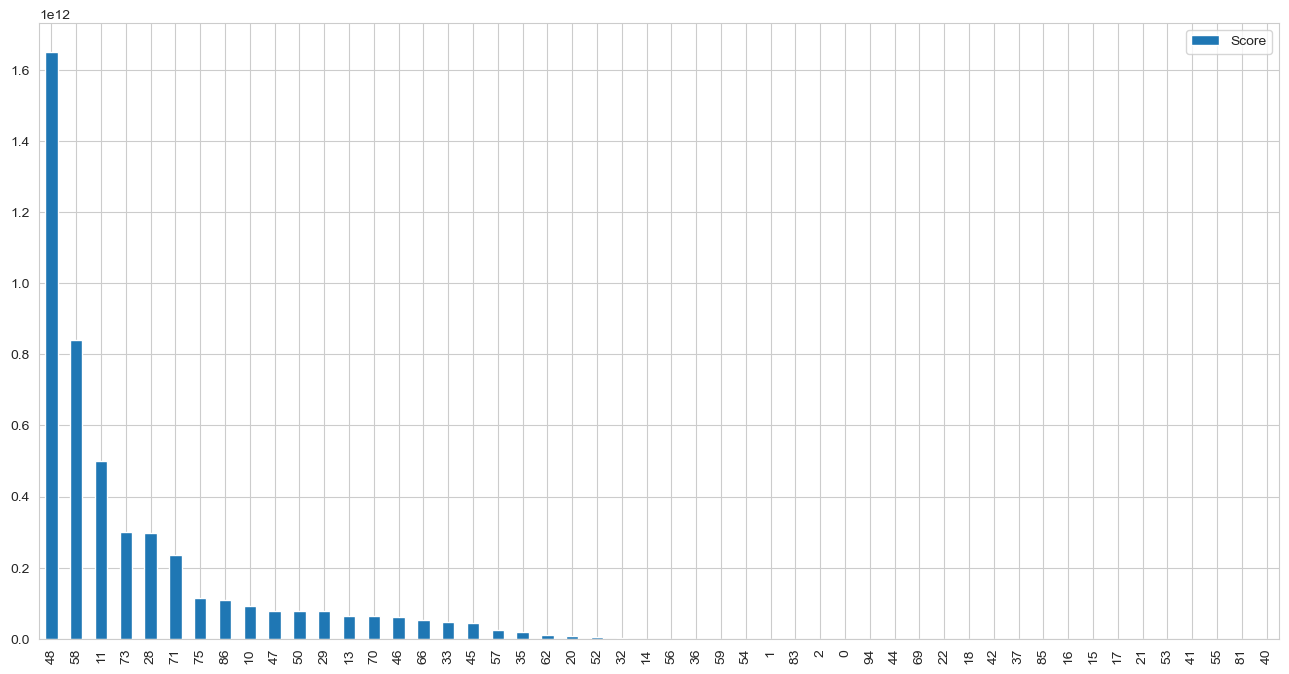

In [28]:
# Plot Top 50 features in a graph
feature_scores.nlargest(50, 'Score').plot(kind = 'bar', figsize = [16, 8])
plt.show()

In [29]:
# Generate X with only selected features
best_X = pd.concat([resampled_X[column] for column in feature_scores.nlargest(50, 'Score')['Feature']], axis =1)
best_X.head()


,Fixed Assets Turnover Frequency,Cash/Current Liability,Research and development expense rate,Cash Turnover Rate,Total Asset Growth Rate,Quick Asset Turnover Rate,Fixed Assets to Assets,Total assets to GNP price,Operating Expense Rate,Inventory Turnover Rate (times),...,Net Income to Total Assets,Net Value Per Share (A),Net Value Per Share (B),Net Value Per Share (C),Operating Profit Per Share (Yuan ¥),Working Capital to Total Assets,Operating profit/Paid-in capital,Current Assets/Total Assets,CFO to Assets,Contingent liabilities/Net worth
0,1.165007e-04,1.473360e-04,0.0,4.580000e+08,4.980000e+09,6.550000e+09,0.424206,0.009219,1.256969e-04,1.820926e-04,...,0.716845,0.147950,0.147950,0.147950,0.095921,0.672775,0.095885,0.190643,0.520382,0.006479
1,7.190000e+08,1.383910e-03,0.0,2.490000e+09,6.110000e+09,7.700000e+09,0.468828,0.008323,2.897851e-04,9.360000e+09,...,0.795297,0.182251,0.182251,0.182251,0.093722,0.751111,0.093743,0.182419,0.567101,0.005835
2,2.650000e+09,5.340000e+09,25500000.0,7.610000e+08,7.280000e+09,1.022676e-03,0.276179,0.040003,2.361297e-04,6.500000e+07,...,0.774670,0.177911,0.177911,0.193713,0.092338,0.829502,0.092318,0.602806,0.538491,0.006562
3,9.150000e+09,1.010646e-03,0.0,2.030000e+09,4.880000e+09,6.050000e+09,0.559144,0.003252,1.078888e-04,7.130000e+09,...,0.739555,0.154187,0.154187,0.154187,0.077762,0.725754,0.077727,0.225815,0.604105,0.005366
4,2.935211e-04,6.804636e-04,0.0,8.240000e+08,5.510000e+09,5.050000e+09,0.309555,0.003878,7.890000e+09,1.633674e-04,...,0.795016,0.167502,0.167502,0.167502,0.096898,0.751822,0.096927,0.358380,0.578469,0.006624


In [30]:
# Check columns of Best Features
best_X.columns
pd.set_option('display.max_columns', None)  # Show all columns

# Print all column values of the first row
first_row = best_X.iloc[2].to_dict()
print(first_row)

{' Fixed Assets Turnover Frequency': 2650000000.0, ' Cash/Current Liability': 5340000000.0, ' Research and development expense rate': 25500000.0, ' Cash Turnover Rate': 761000000.0, ' Total Asset Growth Rate': 7280000000.0, ' Quick Asset Turnover Rate': 0.001022676471902, ' Fixed Assets to Assets': 0.276179222234543, ' Total assets to GNP price': 0.0400028528527523, ' Operating Expense Rate': 0.0002361297205563, ' Inventory Turnover Rate (times)': 65000000.0, ' Revenue per person': 0.0289969595934374, ' Net Value Growth Rate': 0.0003964253147034, ' Interest-bearing debt interest rate': 0.0007900790079007, ' Current Asset Turnover Rate': 0.0017910937001909, ' Average Collection Days': 0.004226849460116, ' Long-term Liability to Current Assets': 0.0037151156933692, ' Quick Ratio': 0.0053475602224365, ' Accounts Receivable Turnover': 0.0014953384801111, ' Quick Assets/Current Liability': 0.006302481382547, ' Total debt/Total net worth': 0.0212476860084444, ' Inventory/Current Liability': 

In [31]:
# Scale data
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(resampled_X))

In [32]:
# Split Resampled Data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(scaled_X, resampled_y, random_state = 42, test_size = 0.2)

In [33]:
# Check Training and Testing Data
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
8928,-0.201857,-0.275763,-0.153261,-0.667286,-0.668961,0.010094,0.016964,0.019899,0.009578,0.014435,-0.424956,0.413856,-0.029501,-0.123653,-0.595586,-0.822283,-0.816926,-0.819785,-0.261804,0.052711,-0.018468,-0.393375,-0.237436,0.029571,0.066178,0.143092,0.141116,0.027021,0.105684,-0.03342,0.194257,0.173290,-0.008705,-0.046312,0.101145,-0.044923,0.769769,-0.769769,-0.124996,0.079743,-0.064547,-0.400049,-0.251957,-0.258948,-0.504645,-0.038806,-0.028254,-0.676123,1.762882,-0.255307,-0.04103,-0.219244,-0.040031,-1.687621,-1.258322,-1.517532,-0.695235,-0.015048,-0.152055,0.404611,-0.014311,-0.076831,-0.096156,-0.399838,-0.268701,-0.005046,-0.086315,-0.813588,-0.037762,-0.412565,2.437480,0.891975,-0.020141,-0.458248,0.004635,-0.039143,-0.399838,-0.005046,0.088679,0.067578,0.034881,0.368291,0.060545,1.834088,-0.024628,-0.270187,-0.075673,0.370663,-0.667373,0.034004,0.019186,0.052039,-0.080960,0.0,-0.405768,0.0
6847,-2.363522,-2.547322,-2.578502,-0.449475,-0.450837,0.008675,-0.014249,-0.009244,-0.048466,-0.006221,-0.594877,-0.095199,0.801289,-0.123653,-0.595586,-1.283737,-1.276733,-1.279314,-1.165075,0.542805,-0.018468,-0.822527,-1.096085,-0.032864,0.027166,-0.036496,-0.038048,-0.011725,-1.205258,-0.03342,-0.373003,1.362152,-0.008705,-0.046312,-0.037767,-0.044923,0.704347,-0.704347,-0.120354,0.159352,-0.057897,-0.832091,-1.160970,0.583205,0.513464,-0.038806,-0.028254,-0.275940,-0.510273,0.110081,-0.04103,-1.478754,-0.040031,-0.803996,-0.846191,0.186156,-0.632262,-0.015048,-0.152055,1.222544,1.015495,0.850721,-0.096156,0.874872,-0.020274,0.239634,-0.086315,-3.280498,-0.040062,2.840328,2.276090,-0.659275,-0.008856,-0.697125,0.003663,-0.039143,0.874872,0.239634,-0.251116,-0.433731,-0.051475,2.806348,-0.499882,0.352989,-0.024628,-3.343515,-0.075673,-0.041380,-0.449615,-0.965426,0.132784,-0.083143,-0.061860,0.0,-0.366730,0.0
4292,0.258041,0.425488,0.318005,-0.493623,-0.494109,0.024040,0.046110,0.046398,0.034057,0.045266,0.428416,-0.123658,-0.404623,-0.123653,0.453678,-0.787745,-0.782512,-0.785391,0.311111,-1.157672,-0.018468,0.056845,0.247582,-0.022928,0.097298,0.159989,0.161813,0.026788,1.842685,-0.03342,0.047249,-1.731381,-0.008705,-0.046312,0.095760,-0.044923,1.320289,-1.320289,-0.067712,0.108520,0.014711,0.055730,0.260778,1.430126,3.747017,-0.038806,-0.028254,-0.676123,-0.510273,4.714061,-0.04103,0.355644,-0.040031,-0.192679,2.772513,1.679105,-0.559038,-0.015048,-0.152055,2.144416,-0.479941,-0.054842,10.206519,1.269188,0.146706,0.449097,8.988480,0.000645,-0.002930,-0.563182,2.234188,1.839718,-0.005831,-0.638217,0.003801,-0.039143,1.269188,0.449097,-0.247773,-0.394407,-0.045325,-1.380993,-0.379925,-0.032267,-0.024628,0.432934,-0.075673,0.016296,-0.493396,0.182660,0.274994,-0.039548,0.143503,0.0,-0.475899,0.0
1042,0.434842,0.515590,0.480851,-0.408334,-0.409637,0.017893,0.062211,0.060694,0.080210,0.061425,-0.594877,1.048202,-0.076434,-0.123653,-0.523360,2.177145,2.171786,2.167124,0.588578,-0.079162,-0.018468,-0.335120,0.482242,-0.037467,-0.001262,0.126760,0.124823,0.023944,0.427515,-0.03342,0.024039,-0.025678,-0.008705,-0.046312,-0.011945,-0.044923,-1.510953,1.510953,-0.102475,-0.308126,-0.071365,-0.339798,0.507911,-0.373106,-0.666870,-0.038806,-0.028254,2.098544,-0.510273,-0.631734,-0.04103,-0.073954,-0.040031,0.302726,-0.758127,-0.985406,-0.459764,-0.015048,-0.152055,-1.497119,-0.098319,-0.026101,-0.096156,-1.131695,0.103875,-0.266207,-0.086315,1.299411,0.028917,-0.796922,-0.449580,-0.702895,0.006822,1.376414,0.006840,-0.039143,-1.131695,-0.266207,-0.251116,0.323169,0.217696,-0.103389,0.122777,-0.758909,-0.024628,0.577505,-0.075673,0.092775,-0.408244,0.172336,-0.272317,-0.076513,-0.013741,0.0,0.751223,0.0
2389,-0.357303,-0.426926,-0.589929,0.876615,0.877159,0.00

In [34]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
5665,-0.276767,-0.287623,-0.268759,-0.181523,-0.182500,0.021583,0.028871,0.029597,0.005935,0.027233,-0.594877,2.868324,0.176001,-0.123653,-0.595586,-0.107572,-0.104769,-0.108057,-0.364233,0.291355,-0.018468,-0.202306,-0.330211,-0.040123,0.041464,0.085219,0.083380,0.015801,0.239348,-0.03342,-0.165299,0.089648,-0.008705,-0.046312,-0.031644,-0.044923,-0.026395,0.026395,-0.106478,-0.180514,-0.042667,-0.206647,-0.343014,-0.078669,-0.125390,-0.038806,-0.028254,-0.676123,-0.510273,-0.166882,-0.04103,-0.031599,-0.040031,0.758374,0.678185,0.318318,-0.461267,-0.015048,-0.152055,-0.593706,0.088541,-0.035038,-0.096156,-1.156299,0.233013,-0.178347,-0.086315,0.104546,-0.026484,-0.049717,-0.44958,-0.702895,0.004638,0.341568,0.002231,-0.039143,-1.156299,-0.178347,0.042462,-0.405714,-0.091042,0.494596,-0.144888,-0.599486,-0.024628,-0.137808,-0.075673,0.059313,-0.181704,0.090438,-0.145045,-0.082390,-0.053510,0.0,-0.248095,0.0
9124,-0.127252,0.095108,-0.061466,0.514867,0.514891,0.014313,0.019381,0.022643,0.004394,0.021733,-0.594877,-0.697625,-0.440307,-0.123653,-0.595586,0.155636,0.157499,0.180613,-0.030772,-1.865383,-0.018468,-0.205466,-0.075332,-0.026800,0.050977,0.099825,0.098820,0.017036,0.718446,-0.03342,0.014039,-1.446259,-0.008705,-0.046312,-0.898238,-0.044923,0.895689,-0.895689,24.922308,0.238895,-0.061654,-0.208668,-0.067612,1.176278,-1.107276,-0.038806,0.610031,-0.648932,-0.510273,-0.717013,-0.04103,-0.162277,13.017926,0.686065,-1.140864,2.151517,-0.569801,-0.015048,2.205939,1.573793,-0.512571,0.146984,-0.096156,1.033761,0.354166,0.222783,-0.086315,0.238098,-0.024086,-0.755315,-0.44958,-0.702895,0.127640,-0.444698,-0.005365,32.359316,1.033761,0.222783,-0.232522,-0.019277,0.026374,-1.382641,-0.032330,-0.316115,-0.024628,0.203156,-0.075673,-0.556122,0.514799,0.132560,0.100223,-0.099284,-0.215453,0.0,-0.408030,0.0
5163,3.255483,3.048528,3.192373,0.861151,0.855103,0.054342,0.082807,0.076970,0.034842,0.080737,1.960196,1.280912,1.062332,-0.123653,-0.091590,11.805794,11.766036,11.755587,15.325739,13.294842,-0.018468,19.590312,13.771502,-0.012781,0.069310,0.151298,0.149303,0.029035,-2.034333,-0.03342,0.398830,1.164146,-0.008705,-0.046312,-0.011945,-0.044923,-0.738575,0.738575,-0.002843,-0.308126,-0.071365,19.767387,14.557065,-0.170843,1.892856,-0.038806,-0.028254,-0.676123,-0.510273,0.552744,-0.04103,2.313242,-0.040031,1.987139,2.827572,2.079342,4.371383,-0.015048,-0.152055,-0.145122,1.521309,-0.048566,-0.096156,1.302541,0.342094,-0.177726,-0.086315,2.022639,0.090045,-0.388457,-0.44958,-0.702895,0.004195,-0.880723,0.011988,-0.039143,1.302541,-0.177726,-0.251116,3.225159,1.233945,2.880080,1.099187,-0.729527,-0.024628,2.230394,-0.075673,0.073855,0.861311,0.345670,-0.221136,-0.076512,-0.013736,0.0,0.016221,0.0
12654,-0.406369,-0.093214,-0.316678,-0.263128,-0.258499,0.019435,0.022970,0.027096,-0.000609,0.019030,-0.594877,0.724582,-0.332091,-0.123653,-0.595586,-0.019116,-0.016628,-0.019970,-0.536471,-0.558099,-0.018468,-0.299430,-0.456222,-0.038076,0.022160,-0.254081,-0.255120,0.002753,0.379872,-0.03342,-0.052025,-0.309109,-0.008705,-0.046312,-0.155924,-0.044923,0.104090,-0.104090,-0.108426,0.021855,-0.049720,-0.303802,-0.467639,0.098809,-0.591898,-0.038806,-0.028254,0.676158,-0.510273,-0.335466,-0.04103,-0.075203,-0.040031,0.003336,0.054233,0.280453,-0.523400,-0.015048,-0.152055,0.313478,-0.346364,-0.032108,-0.096156,0.358931,-0.093180,0.113157,-0.086315,0.123947,-0.024486,-0.349101,-0.44958,-0.702895,0.002041,0.724874,0.000486,-0.039143,0.358931,0.113157,-0.097025,-0.423981,-0.135249,-0.619014,-0.085448,-0.082323,-0.024628,-0.014650,-0.075673,-0.004248,-0.263102,0.021486,0.068170,-0.098850,-0.212433,0.0,-0.200729,0.0
9515,-1.487306,-1.251604,-1.453389,-1.063396,-1.065521,-

In [35]:
y_train.head()

,Bankrupt?
8928,1
6847,1
4292,0
1042,0
2389,0


In [36]:
y_test.head()

,Bankrupt?
5665,0
9124,1
5163,0
12654,1
9515,1


In [37]:
# Initialize and fit Logistic Regression Model
logistic_regression = LogisticRegression(solver='liblinear', max_iter=100)
logistic_regression.fit(X_train, y_train.squeeze())

LogisticRegression(solver='liblinear')

In [38]:
# Predict values from Logistic Regression
logistic_regression_prediction = logistic_regression.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1334
           1       0.90      0.92      0.91      1306

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

[[1195  139]
 [ 101 1205]]


<Axes: >

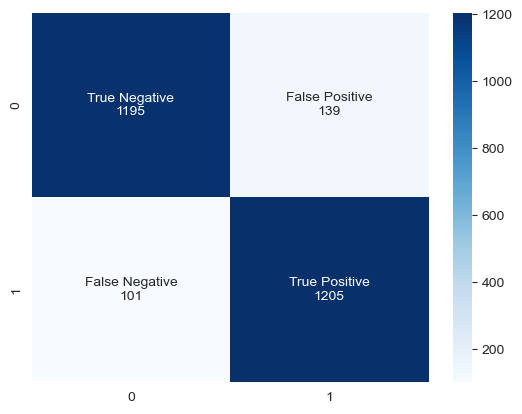

In [39]:
# Print classification report of logistic regression
print(classification_report(y_test, logistic_regression_prediction))

# Generate Confusion Matrix
logistic_regression_confusion_matrix = confusion_matrix(y_test, logistic_regression_prediction)
print(logistic_regression_confusion_matrix)

group_names = ['True Negative','False Positive','False Negative','True Positive']
logistic_confusion_matrix_group_counts = ["{0:0.0f}".format(value) for value in
                logistic_regression_confusion_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,logistic_confusion_matrix_group_counts)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(logistic_regression_confusion_matrix, annot=labels, fmt='', cmap='Blues')

In [40]:
# Initialze and fit Naive Bayes Model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train.squeeze())

GaussianNB()

In [41]:
# Predict values from Naive Bayes
naive_bayes_prediction = naive_bayes.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.45      0.61      1334
           1       0.63      0.97      0.77      1306

    accuracy                           0.71      2640
   macro avg       0.78      0.71      0.69      2640
weighted avg       0.79      0.71      0.69      2640

[[ 603  731]
 [  42 1264]]


<Axes: >

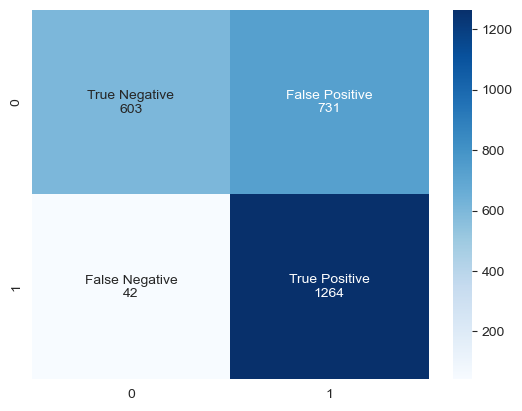

In [42]:
# Print Classification Report of Naive Bayes Model
print(classification_report(y_test, naive_bayes_prediction))

# Generate Confusion Matrix
naive_bayes_confusion_matrix = confusion_matrix(y_test, naive_bayes_prediction)
print(naive_bayes_confusion_matrix)

naive_bayes_matrix_group_counts = ["{0:0.0f}".format(value) for value in
                naive_bayes_confusion_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,naive_bayes_matrix_group_counts)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(naive_bayes_confusion_matrix, annot=labels, fmt='', cmap='Blues')

In [43]:
# Initialze and fit Random Forest Model
random_forest = RandomForestClassifier(max_depth = 4, random_state = 0)
random_forest.fit(X_train, y_train.squeeze())

RandomForestClassifier(max_depth=4, random_state=0)

In [44]:
# Predict values using Random Forest
random_forest_prediction = random_forest.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1334
           1       0.89      0.91      0.90      1306

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

[[1192  142]
 [ 117 1189]]


<Axes: >

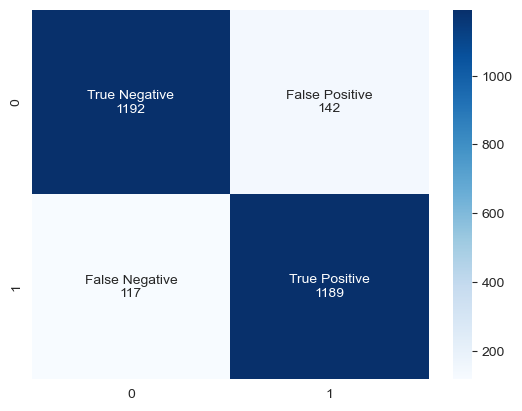

In [45]:
# Print Classification Report of Random Forest
print(classification_report(y_test, random_forest_prediction))

# Generate Confusion Matrix
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_prediction)
print(random_forest_confusion_matrix)

random_forest_matrix_group_counts = ["{0:0.0f}".format(value) for value in
                random_forest_confusion_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,random_forest_matrix_group_counts)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(random_forest_confusion_matrix, annot=labels, fmt='', cmap='Blues')

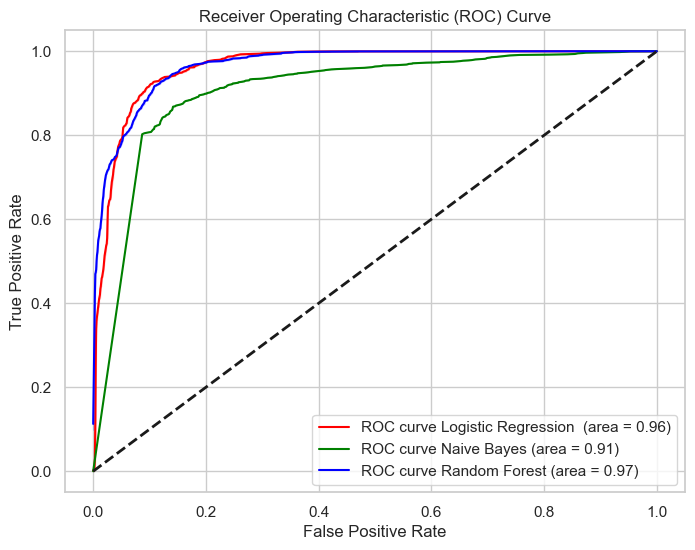

In [46]:
# ROC curve
# Calculate ROC of Logistic Regression
prediction_proability_logistic_regression = logistic_regression.predict_proba(X_test)[:, 1]
fpr_logistic_regression, tpr_logisitic_regression, thresholds = roc_curve(y_test, prediction_proability_logistic_regression)
roc_auc_logisitic_regression = auc(fpr_logistic_regression, tpr_logisitic_regression)

# Calculate ROC of Naive Bayes
prediction_proability_naive_bayes = naive_bayes.predict_proba(X_test)[:, 1]
fpr_naive_bayes, tpr_naive_bayes, thresholds = roc_curve(y_test, prediction_proability_naive_bayes)
roc_auc_naive_bayes = auc(fpr_naive_bayes, tpr_naive_bayes)

# Calcualte ROC of Random Forest
prediction_proability_random_forest = random_forest.predict_proba(X_test)[:,1]
fpr_random_forest, tpr_random_forest, thresholds = roc_curve(y_test, prediction_proability_random_forest) 
roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)

# Plot the ROC curve

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(x = fpr_logistic_regression, y = tpr_logisitic_regression, color='red', label=f'ROC curve Logistic Regression  (area = {roc_auc_logisitic_regression:.2f})')
sns.lineplot(x = fpr_naive_bayes, y = tpr_naive_bayes, color='green', label=f'ROC curve Naive Bayes (area = {roc_auc_naive_bayes:.2f})')
sns.lineplot(x = fpr_random_forest, y = tpr_random_forest, color='blue', label=f'ROC curve Random Forest (area = {roc_auc_random_forest:.2f})')

# Plot a diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()

In [47]:
# K-fold Validation
logistic_regression_scores = cross_val_score(logistic_regression, X_train, y_train.squeeze(), cv = 10)
print("%0.2f is the accuracy of Logistic Regression model with a standard deviation of %0.2f" % (logistic_regression_scores.mean(), logistic_regression_scores.std()))

naive_bayes_scores = cross_val_score(naive_bayes, X_train, y_train.squeeze(), cv = 10)
print("%0.2f is the accuracy of Naive Bayes model with a standard deviation of %0.2f" % (naive_bayes_scores.mean(), naive_bayes_scores.std()))

random_forest_scores = cross_val_score(random_forest, X_train, y_train.squeeze(), cv = 10)
print("%0.2f is the accuracy of Random Forest model with a standard deviation of %0.2f" % (random_forest_scores.mean(), random_forest_scores.std()))

0.91 is the accuracy of Logistic Regression model with a standard deviation of 0.01
0.73 is the accuracy of Naive Bayes model with a standard deviation of 0.04
0.91 is the accuracy of Random Forest model with a standard deviation of 0.01


In [48]:
# Model Training using only best features

# Scale Best X
scaled_X = pd.DataFrame(scaler.fit_transform(best_X))

# Separate Best X into training and testing Set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, resampled_y, test_size = 0.2, random_state = 42)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1334
           1       0.89      0.91      0.90      1306

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

[[1185  149]
 [ 115 1191]]


<Axes: >

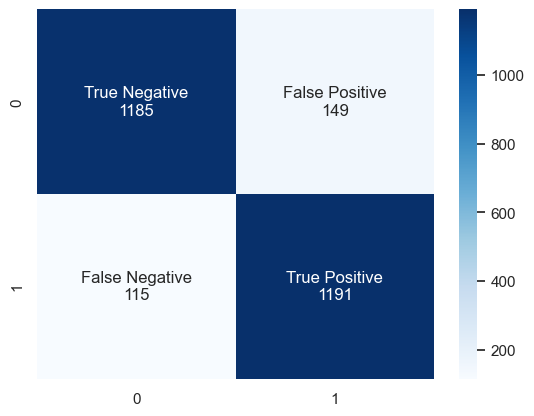

In [49]:
# Fit Models on Best Feautres
# Fit Logistic Regression Model
logistic_regression.fit(X_train, y_train.squeeze())

# Predict from Logistic Regression Model
logistic_regression_prediction_best_features = logistic_regression.predict(X_test)

# Print Classification Report of Logistic Regression Model
print(classification_report(y_test, logistic_regression_prediction_best_features))

# Generate Confusion Matrix
logistic_regression_best_features_confusion_matrix = confusion_matrix(y_test, logistic_regression_prediction_best_features)
print(logistic_regression_best_features_confusion_matrix)

logistic_regression_best_features_confusion_matrix_group_counts = ["{0:0.0f}".format(value) for value in
                logistic_regression_best_features_confusion_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,logistic_regression_best_features_confusion_matrix_group_counts)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(logistic_regression_best_features_confusion_matrix, annot=labels, fmt='', cmap='Blues')

              precision    recall  f1-score   support

           0       0.94      0.59      0.73      1334
           1       0.70      0.96      0.81      1306

    accuracy                           0.78      2640
   macro avg       0.82      0.78      0.77      2640
weighted avg       0.82      0.78      0.77      2640

[[ 792  542]
 [  48 1258]]


<Axes: >

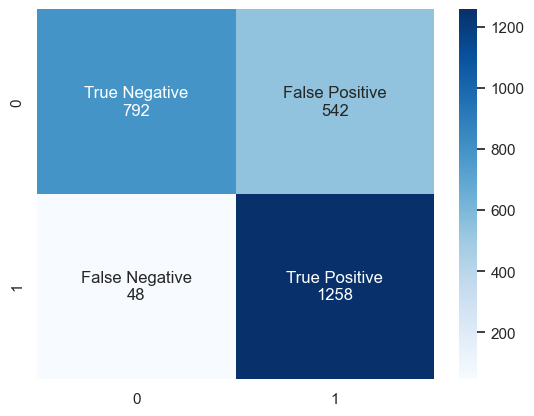

In [50]:
# Fit Naive Bayes Model
naive_bayes.fit(X_train, y_train.squeeze())

# Predict from Naive Bayes Model
naive_bayes_prediction_best_features = naive_bayes.predict(X_test)

# Print Classification Report of Logistic Regression Model
print(classification_report(y_test, naive_bayes_prediction_best_features))

# Generate Confusion Matrix
naive_bayes_best_features_confusion_matrix = confusion_matrix(y_test, naive_bayes_prediction_best_features)
print(naive_bayes_best_features_confusion_matrix)

naive_bayes_best_features_confusion_matrix_group_counts = ["{0:0.0f}".format(value) for value in
                naive_bayes_best_features_confusion_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,naive_bayes_best_features_confusion_matrix_group_counts)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(naive_bayes_best_features_confusion_matrix, annot=labels, fmt='', cmap='Blues')

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1334
           1       0.88      0.89      0.89      1306

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640

[[1182  152]
 [ 140 1166]]


<Axes: >

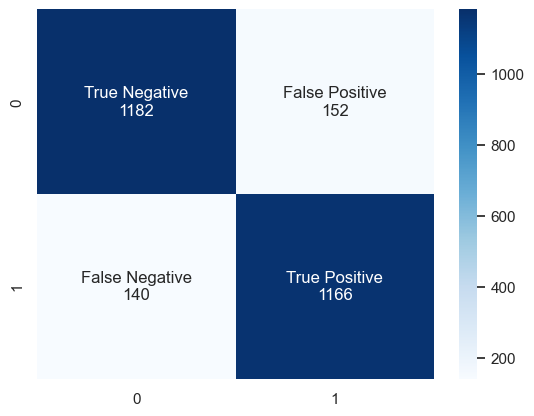

In [51]:
# Fit Random Forest Model
random_forest.fit(X_train, y_train.squeeze())

# Predict from Naive Bayes Model
random_forest_prediction_best_features = random_forest.predict(X_test)

# Print Classification Report of Logistic Regression Model
print(classification_report(y_test, random_forest_prediction_best_features))

# Generate Confusion Matrix
random_forest_best_features_confusion_matrix = confusion_matrix(y_test, random_forest_prediction_best_features)
print(random_forest_best_features_confusion_matrix)

random_forest_best_features_confusion_matrix_group_counts = ["{0:0.0f}".format(value) for value in
                random_forest_best_features_confusion_matrix.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,random_forest_best_features_confusion_matrix_group_counts)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(random_forest_best_features_confusion_matrix, annot=labels, fmt='', cmap='Blues')

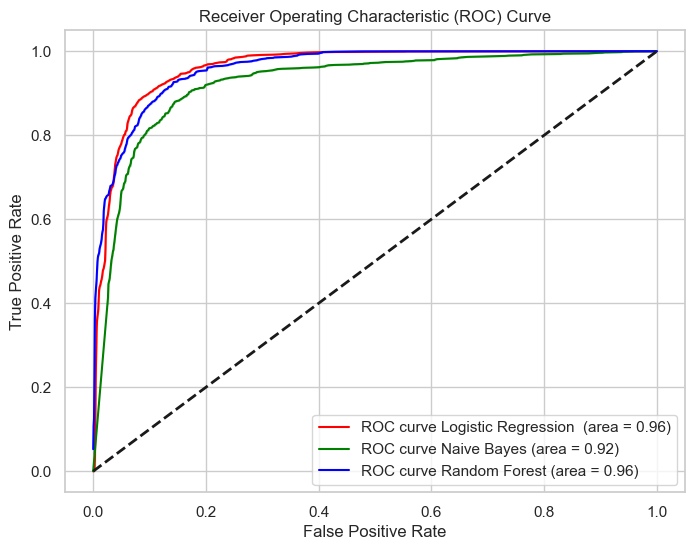

In [52]:
# ROC curve
# Calculate ROC of Logistic Regression
prediction_proability_logistic_regression_best_features = logistic_regression.predict_proba(X_test)[:, 1]
fpr_logistic_regression_best_features, tpr_logisitic_regression_best_features, thresholds_best_features = roc_curve(y_test, prediction_proability_logistic_regression_best_features)
roc_auc_logisitic_regression_best_features = auc(fpr_logistic_regression_best_features, tpr_logisitic_regression_best_features)

# Calculate ROC of Naive Bayes
prediction_proability_naive_bayes_best_features = naive_bayes.predict_proba(X_test)[:, 1]
fpr_naive_bayes_best_features, tpr_naive_bayes_best_features, thresholds_best_features = roc_curve(y_test, prediction_proability_naive_bayes_best_features)
roc_auc_naive_bayes_best_features = auc(fpr_naive_bayes_best_features, tpr_naive_bayes_best_features)

# Calcualte ROC of Random Forest
prediction_proability_random_forest_best_features = random_forest.predict_proba(X_test)[:,1]
fpr_random_forest_best_features, tpr_random_forest_best_features, thresholds_best_features = roc_curve(y_test, prediction_proability_random_forest_best_features) 
roc_auc_random_forest_best_features = auc(fpr_random_forest_best_features, tpr_random_forest_best_features)

# Plot the ROC curve

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(x = fpr_logistic_regression_best_features, y = tpr_logisitic_regression_best_features, color='red', label=f'ROC curve Logistic Regression  (area = {roc_auc_logisitic_regression_best_features:.2f})')
sns.lineplot(x = fpr_naive_bayes_best_features, y = tpr_naive_bayes_best_features, color='green', label=f'ROC curve Naive Bayes (area = {roc_auc_naive_bayes_best_features:.2f})')
sns.lineplot(x = fpr_random_forest_best_features, y = tpr_random_forest_best_features, color='blue', label=f'ROC curve Random Forest (area = {roc_auc_random_forest_best_features:.2f})')

# Plot a diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()

In [53]:
# K-fold Validation
logistic_regression_best_features_scores = cross_val_score(logistic_regression, X_train, y_train.squeeze(), cv = 10)
print("%0.2f is the accuracy of Logistic Regression model with a standard deviation of %0.2f" % (logistic_regression_best_features_scores.mean(), logistic_regression_best_features_scores.std()))

naive_bayes_best_features_scores = cross_val_score(naive_bayes, X_train, y_train.squeeze(), cv = 10)
print("%0.2f is the accuracy of Naive Bayes model with a standard deviation of %0.2f" % (naive_bayes_best_features_scores.mean(), naive_bayes_best_features_scores.std()))

random_forest_best_features_scores = cross_val_score(random_forest, X_train, y_train.squeeze(), cv = 10)
print("%0.2f is the accuracy of Random Forest model with a standard deviation of %0.2f" % (random_forest_best_features_scores.mean(), random_forest_best_features_scores.std()))

0.90 is the accuracy of Logistic Regression model with a standard deviation of 0.01
0.80 is the accuracy of Naive Bayes model with a standard deviation of 0.03
0.89 is the accuracy of Random Forest model with a standard deviation of 0.01


In [54]:
# Save Logistic Regression Model
with open('logistic_regression.pickle', 'wb') as f:
    pickle.dump(logistic_regression, f)

In [55]:
# Save Naive Bayes Model
with open('naive_bayes.pickle', 'wb') as f:
    pickle.dump(naive_bayes, f)

In [56]:
# Save Random Forest Model
with open('random_forest.pickle', 'wb') as f:
    pickle.dump(random_forest, f)

In [57]:
# Train and Save Scaler
scaler.fit(best_X)
with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)